In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_path = "eval_results/slc"
temperature_humidity = "68_46"

In [6]:
idm_data_0 = pd.read_csv(data_path + "/IDM/stats.csv")
ddpg_data_33 = pd.read_csv(data_path + "/DDPG/stats.csv")
ppo_data_33 = pd.read_csv(data_path + "/PPO/stats.csv")

In [7]:
approach_emission_column_name = "evaluation_sampler_results_custom_metrics_regular_approach_vehicle_emission_" + temperature_humidity + "_mean"
num_vehicles_column_name = "evaluation_sampler_results_custom_metrics_num_vehicle_mean"
speed_column_name = "evaluation_sampler_results_custom_metrics_approach_vehicle_speed_mean"

approach_name_column_name = "evaluation_sampler_results_custom_metrics_single_approach_mean"
intersection_id_column_name = "evaluation_sampler_results_custom_metrics_intersection_id_mean"

In [8]:
idm_data_0 = idm_data_0[[approach_emission_column_name, num_vehicles_column_name, speed_column_name, approach_name_column_name, intersection_id_column_name]]
ddpg_data_33 = ddpg_data_33[[approach_emission_column_name, num_vehicles_column_name, speed_column_name, approach_name_column_name, intersection_id_column_name]]
ppo_data_33 = ppo_data_33[[approach_emission_column_name, num_vehicles_column_name, speed_column_name, approach_name_column_name, intersection_id_column_name]]

In [9]:
new_approach_emission_column_name = "emission"
new_num_vehicles_column_name = "num_vehicle"
new_speed_column_name = "speed"

idm_data_0 = idm_data_0.rename(columns={approach_emission_column_name: new_approach_emission_column_name, \
    num_vehicles_column_name: new_num_vehicles_column_name, speed_column_name: new_speed_column_name})
ddpg_data_33 = ddpg_data_33.rename(columns={approach_emission_column_name: new_approach_emission_column_name, \
    num_vehicles_column_name: new_num_vehicles_column_name, speed_column_name: new_speed_column_name})
ppo_data_33 = ppo_data_33.rename(columns={approach_emission_column_name: new_approach_emission_column_name, \
    num_vehicles_column_name: new_num_vehicles_column_name, speed_column_name: new_speed_column_name})

idm_data_0['approach_intersection'] = idm_data_0[intersection_id_column_name].astype(str) \
            + "_" + idm_data_0[approach_name_column_name].astype(str)
ddpg_data_33['approach_intersection'] = ddpg_data_33[intersection_id_column_name].astype(str) \
            + "_" + ddpg_data_33[approach_name_column_name].astype(str)
ppo_data_33['approach_intersection'] = ppo_data_33[intersection_id_column_name].astype(str) \
            + "_" + ppo_data_33[approach_name_column_name].astype(str)

idm_data_0 = idm_data_0.drop(columns=[approach_name_column_name, intersection_id_column_name])
ddpg_data_33 = ddpg_data_33.drop(columns=[approach_name_column_name, intersection_id_column_name])
ppo_data_33 = ppo_data_33.drop(columns=[approach_name_column_name, intersection_id_column_name])

idm_data_0 = idm_data_0.sort_values(by=['approach_intersection'])
ddpg_data_33 = ddpg_data_33.sort_values(by=['approach_intersection'])
ppo_data_33 = ppo_data_33.sort_values(by=['approach_intersection'])

print(idm_data_0.head(10))

       emission  num_vehicle     speed approach_intersection
90    97.543502        174.0  3.314926               0.0_0.0
91    95.328525        300.0  5.146495               0.0_0.0
92    88.354006        298.0  5.081651               0.0_0.0
93    95.550216        303.0  4.240280               0.0_1.0
94   160.497265         90.0  3.742271               0.0_1.0
95   149.160741         87.0  3.692319               0.0_1.0
98    98.527664        293.0  4.806373               0.0_2.0
96   136.443868         85.0  5.012394               0.0_2.0
97    90.615061        299.0  5.707624               0.0_2.0
100   45.357387        108.0  2.645929               0.0_3.0


In [10]:
idm_data_0 = idm_data_0.groupby(['approach_intersection']).mean().reset_index()
ddpg_data_33 = ddpg_data_33.groupby(['approach_intersection']).mean().reset_index()
ppo_data_33 = ppo_data_33.groupby(['approach_intersection']).mean().reset_index()

print(idm_data_0.head(10))

  approach_intersection    emission  num_vehicle     speed
0               0.0_0.0   93.742011   257.333333  4.514357
1               0.0_1.0  135.069407   160.000000  3.891623
2               0.0_2.0  108.528864   225.666667  5.175463
3               0.0_3.0   65.623833   170.333333  3.187678
4               1.0_0.0   64.104815    83.333333  6.706545
5               1.0_1.0   40.580710    40.333333  7.543135
6               1.0_2.0   48.504543   141.666667  6.845548
7               1.0_3.0   35.002759   172.000000  4.834342
8              10.0_0.0   45.816523   162.000000  6.601938
9              10.0_1.0   56.600956   236.000000  5.205448


In [11]:
idm_data_0['ddpg_emission'] = 0.0
idm_data_0['ppo_emission'] = 0.0

ddpg_success = 0
ppo_success = 0

for index, row in idm_data_0.iterrows():
    ddpg_row = ddpg_data_33.loc[ddpg_data_33['approach_intersection'] == row['approach_intersection']]
    ppo_row = ppo_data_33.loc[ppo_data_33['approach_intersection'] == row['approach_intersection']]
    if row['num_vehicle'] <= ddpg_row['num_vehicle'].values[0]:
        idm_data_0.at[index, 'ddpg_emission'] = ddpg_row['emission'].values[0]
        idm_data_0.at[index, 'ddpg_num_vehicle'] = ddpg_row['num_vehicle'].values[0]
        ddpg_success += 1
    else:
        idm_data_0.at[index, 'ddpg_emission'] = row['emission']
        idm_data_0.at[index, 'ddpg_num_vehicle'] = row['num_vehicle']

    if row['num_vehicle'] <= ppo_row['num_vehicle'].values[0]:
        idm_data_0.at[index, 'ppo_emission'] = ppo_row['emission'].values[0]
        idm_data_0.at[index, 'ppo_num_vehicle'] = ppo_row['num_vehicle'].values[0]
        ppo_success += 1
    else:
        idm_data_0.at[index, 'ppo_emission'] = row['emission']
        idm_data_0.at[index, 'ppo_num_vehicle'] = row['num_vehicle']

print(idm_data_0.head(10))

  approach_intersection    emission  num_vehicle     speed  ddpg_emission  \
0               0.0_0.0   93.742011   257.333333  4.514357     100.197280   
1               0.0_1.0  135.069407   160.000000  3.891623     114.707876   
2               0.0_2.0  108.528864   225.666667  5.175463     128.002374   
3               0.0_3.0   65.623833   170.333333  3.187678      74.828268   
4               1.0_0.0   64.104815    83.333333  6.706545      71.139252   
5               1.0_1.0   40.580710    40.333333  7.543135      40.580710   
6               1.0_2.0   48.504543   141.666667  6.845548      48.504543   
7               1.0_3.0   35.002759   172.000000  4.834342      34.312465   
8              10.0_0.0   45.816523   162.000000  6.601938      38.557598   
9              10.0_1.0   56.600956   236.000000  5.205448      51.357358   

   ppo_emission  ddpg_num_vehicle  ppo_num_vehicle  
0     93.742011        296.000000       257.333333  
1    135.069407        165.666667       160.00

In [12]:
idm_data_0['ddpg_emission_diff'] = idm_data_0['emission'] - idm_data_0['ddpg_emission']
idm_data_0['ppo_emission_diff'] = idm_data_0['emission'] - idm_data_0['ppo_emission']

idm_data_0['ddpg_emission_diff_percentage'] = idm_data_0['ddpg_emission_diff'] / idm_data_0['emission']
idm_data_0['ppo_emission_diff_percentage'] = idm_data_0['ppo_emission_diff'] / idm_data_0['emission']

print("ddpg throughput success percentage: ", ddpg_success / len(idm_data_0) * 100, "%")
print("ppo throughput success percentage: ", ppo_success / len(idm_data_0) * 100, "%")

ddpg throughput success percentage:  80.1526717557252 %
ppo throughput success percentage:  12.881679389312978 %


In [13]:
ddpg_better = idm_data_0[idm_data_0['ddpg_emission_diff_percentage'] < 0]
ppo_better = idm_data_0[idm_data_0['ppo_emission_diff_percentage'] < 0]

print("ddpg emission success percentage: ", len(ddpg_better)/len(idm_data_0) * 100, "%")
print("ppo emission success percentage: ", len(ppo_better)/len(idm_data_0) * 100, "%")

ddpg emission success percentage:  46.37404580152672 %
ppo emission success percentage:  12.5 %


In [14]:
idm_emission_sum = idm_data_0['emission'].sum()
idm_num_vehicle_sum = idm_data_0['num_vehicle'].sum()

ddpg_emission_sum = idm_data_0['ddpg_emission'].sum()
ddpg_num_vehicle_sum = idm_data_0['ddpg_num_vehicle'].sum()

ppo_emission_sum = idm_data_0['ppo_emission'].sum()
ppo_num_vehicle_sum = idm_data_0['ppo_num_vehicle'].sum()


print("ddpg emission average benefit percentage: ", (idm_emission_sum - ddpg_emission_sum)/idm_emission_sum * 100, "%")
print("ppo emission average benefit percentage: ", (idm_emission_sum - ppo_emission_sum)/idm_emission_sum * 100, "%")

print("ddpg num_vehicle average benefit percentage: ", (ddpg_num_vehicle_sum- idm_num_vehicle_sum)/idm_num_vehicle_sum * 100, "%")
print("ppo num_vehicle average benefit percentage: ", (ppo_num_vehicle_sum - idm_num_vehicle_sum)/idm_num_vehicle_sum * 100, "%")

ddpg emission average benefit percentage:  -1.8470477731575428 %
ppo emission average benefit percentage:  -9.586707020784825 %
ddpg num_vehicle average benefit percentage:  6.475386025736324 %
ppo num_vehicle average benefit percentage:  1.5395758904151042 %


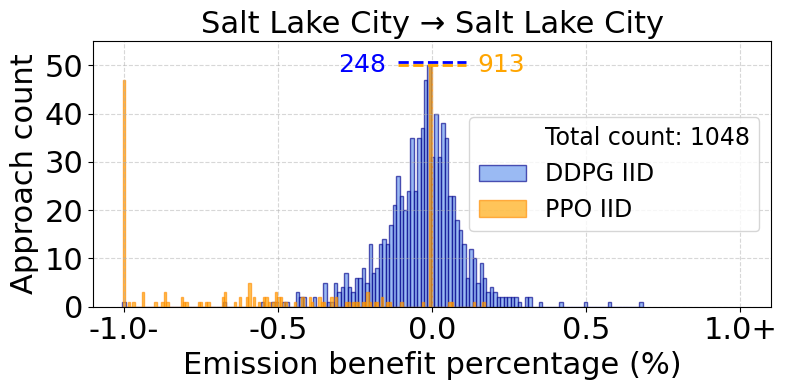

In [15]:
emission_benefit_cap = 1.0 # pecentage
frequency_cap = 50
bins = 150
font_size= 22

idm_data_0['ddpg_emission_diff_percentage'] = idm_data_0['ddpg_emission_diff_percentage'].clip(-1*emission_benefit_cap, emission_benefit_cap)
idm_data_0['ppo_emission_diff_percentage'] = idm_data_0['ppo_emission_diff_percentage'].clip(-1*emission_benefit_cap, emission_benefit_cap)

data_ddpg = idm_data_0['ddpg_emission_diff_percentage']
data_ppo = idm_data_0['ppo_emission_diff_percentage']
hist_ddpg, bins_ddpg = np.histogram(data_ddpg, bins=bins)
hist_ppo, bins_ppo = np.histogram(data_ppo, bins=bins)

hist_ddpg_clone = hist_ddpg.copy()
hist_ppo_clone = hist_ppo.copy()

hist_ddpg[hist_ddpg > frequency_cap] = frequency_cap
hist_ppo[hist_ppo > frequency_cap] = frequency_cap

plt.figure(figsize=(10, 6)) 

plt.bar(bins_ddpg[:-1], hist_ddpg, width=(bins_ddpg[1]-bins_ddpg[0]), alpha=0.65, label='DDPG IID', color='cornflowerblue', edgecolor='darkblue')  
plt.bar(bins_ppo[:-1], hist_ppo, width=(bins_ppo[1]-bins_ppo[0]), alpha=0.65, label='PPO IID', color='orange', edgecolor='darkorange')  

plt.plot([], [], color='white', label='Total count: ' + str(len(idm_data_0)), linewidth=0)

plt.ylim(0, frequency_cap + 5)

plt.xlabel('Emission benefit percentage (%)', fontsize=font_size)  
plt.ylabel('Approach count', fontsize=font_size) 
plt.legend(loc='center right', fontsize=font_size-5)

plt.xlim(-1*emission_benefit_cap-0.1, emission_benefit_cap+0.1)
plt.xticks(ticks=[-1.0, -0.5, 0.0, 0.5, 1.0], labels=['-1.0-', '-0.5', '0.0', '0.5', '1.0+'])
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.gcf().set_size_inches(8, 4)

plt.axhline(y=50.8, xmin=0.45, xmax=0.55, color='blue', linestyle='--', linewidth=2) 
plt.axhline(y=50, xmin=0.45, xmax=0.55, color='orange', linestyle='--', linewidth=2) 

plt.text(-0.15, 50, str(max(hist_ddpg_clone)), color='blue', fontsize=font_size-4, ha='right', va='center') 
plt.text(0.30, 50, str(max(hist_ppo_clone)), color='orange', fontsize=font_size-4, ha='right', va='center')

plt.title('Salt Lake City \u2192 Salt Lake City', fontsize=font_size)  

plt.grid(True, linestyle='--', alpha=0.5) 
plt.tight_layout() 
plt.show()